# **Music genre Classification**

## **Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import scipy
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import pickle 
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# importing dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df.describe

<bound method NDFrame.describe of                filename  length  ...  mfcc20_var  label
0     blues.00000.0.wav   66149  ...   43.771767  blues
1     blues.00000.1.wav   66149  ...   59.943081  blues
2     blues.00000.2.wav   66149  ...   33.105122  blues
3     blues.00000.3.wav   66149  ...   32.023678  blues
4     blues.00000.4.wav   66149  ...   29.146694  blues
...                 ...     ...  ...         ...    ...
9985   rock.00099.5.wav   66149  ...   38.966969   rock
9986   rock.00099.6.wav   66149  ...   18.697033   rock
9987   rock.00099.7.wav   66149  ...   41.586990   rock
9988   rock.00099.8.wav   66149  ...   12.787750   rock
9989   rock.00099.9.wav   66149  ...   31.727489   rock

[9990 rows x 60 columns]>

In [ ]:
# removing filename column
df = df.drop(labels='filename',axis=1)

# **Sample Audio Testing**

In [ ]:
#default sr=22050
sample_audio = "/content/drive/MyDrive/Colab Notebooks/dataset/Data/genres_original/classical/classical.00000.wav"
sample, sample_rate = librosa.load(sample_audio)
ipd.Audio(sample, rate=sample_rate)

In [ ]:
sample, sample_rate = librosa.load(sample_audio, sr=16000)
print(len(sample),sample_rate)

480214 16000


<class 'numpy.ndarray'> 16000


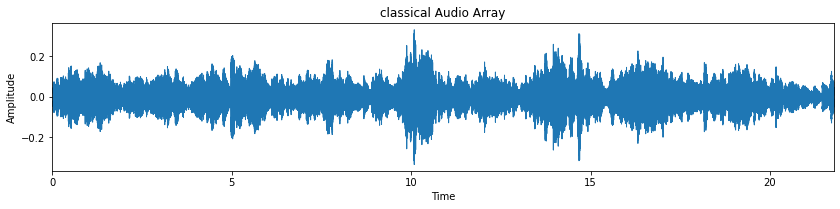

In [ ]:
print(type(sample),sample_rate)
sample, sample_rate = librosa.load(sample_audio, sr=16000)

# plotting raw wave Files, here it is for Classical genre

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
ax1.set_title("classical Audio Array")
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(sample)
plt.show()

/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


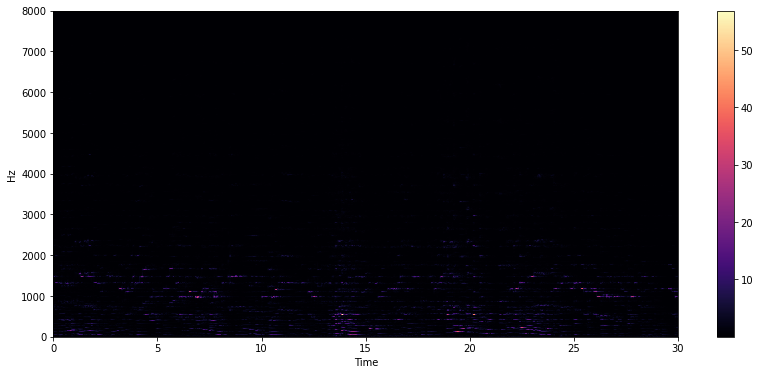

In [ ]:
stft = librosa.stft(sample)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))

#Display a spectrogram

librosa.display.specshow(stft,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()

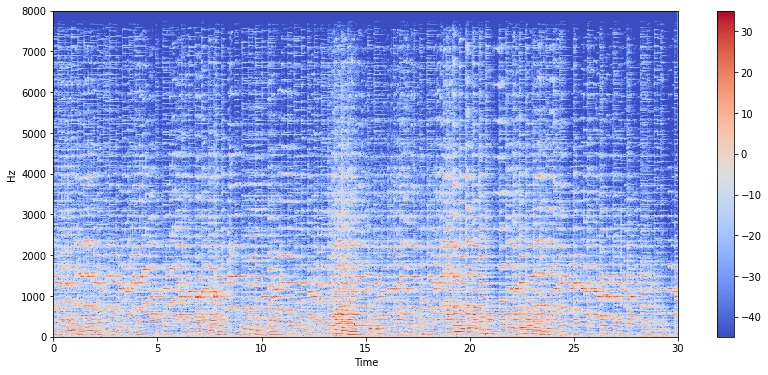

In [ ]:
stft = librosa.stft(sample)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sample_rate,x_axis='time',y_axis='hz')
plt.colorbar()

In [ ]:
zero_cross = librosa.zero_crossings(sample[8000:12000],pad=False)
print("Count {}".format(sum(zero_cross)))

Count 607


# **Feature Extraction**

In [ ]:
# encoding the labels
class_list = df.iloc[:,-1] 
Encoder = LabelEncoder()
y = Encoder.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
df.iloc[:,:-1]

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,1642

In [ ]:
# scaling features columns
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X = Scaler.fit_transform(np.array(df.iloc[:,:-1],dtype=float))
print(X.shape)

(9990, 58)


In [ ]:
# dividing into training and test Data
X_train,x_test, Y_train, y_test = train_test_split(X,y,test_size=0.2)
print(len(Y_train),len(y_test))

7992 1998


# **Model Building**

In [ ]:
# Using CNN algorithm
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# building model
model = Sequential()
model.add(Dense(256,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               15104     
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

In [ ]:
# compile over adam optimizer
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
# model fit
earlystop = EarlyStopping(monitor='val_loss',patience=4) 
history = model.fit(X_train,Y_train, validation_data=(x_test,y_test), verbose=1, callbacks=[earlystop] ,epochs=600,  batch_size=128)

Epoch 1/600
63/63 [==============================] - 1s 10ms/step - loss: 1.7018 - accuracy: 0.3825 - val_loss: 1.1618 - val_accuracy: 0.5931
Epoch 2/600
63/63 [==============================] - 0s 6ms/step - loss: 1.1855 - accuracy: 0.5758 - val_loss: 0.9094 - val_accuracy: 0.6937
Epoch 3/600
63/63 [==============================] - 0s 6ms/step - loss: 0.9841 - accuracy: 0.6567 - val_loss: 0.7893 - val_accuracy: 0.7262
Epoch 4/600
63/63 [==============================] - 0s 6ms/step - loss: 0.8800 - accuracy: 0.6947 - val_loss: 0.7079 - val_accuracy: 0.7613
Epoch 5/600
63/63 [==============================] - 0s 5ms/step - loss: 0.8039 - accuracy: 0.7266 - val_loss: 0.6686 - val_accuracy: 0.7738
Epoch 6/600
63/63 [==============================] - 0s 6ms/step - loss: 0.7329 - accuracy: 0.7454 - val_loss: 0.6318 - val_accuracy: 0.7798
Epoch 7/600
63/63 [==============================] - 0s 6ms/step - loss: 0.6834 - accuracy: 0.7660 - val_loss: 0.5905 - val_accuracy: 0.8048
Epoch 8/600


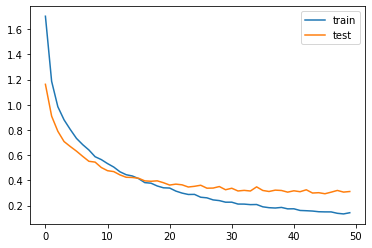

In [ ]:
# Training loss and Validation loss
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

# **Accuracy Evaluation**

In [ ]:
# accuracy evaluation
test_loss, test_accuracy = model.evaluate(x_test,y_test,batch_size=128)
print("Test loss : ",test_loss)
print("\nBest test accuracy : ",test_accuracy*100)

16/16 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.9164
Test loss :  0.3116280138492584

Best test accuracy :  91.64164066314697
